Estudiante: Maldonado Aguilar Angel Julian.

Modulos utilizados.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import \
    train_test_split, \
    cross_val_score, \
    GridSearchCV, \
    RandomizedSearchCV

from sklearn.preprocessing import scale
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier      # Vecinos mas cercanos.
from sklearn.linear_model import LogisticRegression     # Regresion logistica.
from keras.models import Sequential                     # Redes neuronales.
from keras.layers import Dense, BatchNormalization      # Redes neuronales.
from keras.wrappers.scikit_learn import KerasClassifier # Redes neuronales.
from sklearn.svm import SVC                             # Maquinas de soporte vectorial.

# Exploración.

In [ ]:
# Carga de los datos.
df = pd.read_csv('DatosKarenApp.csv')

In [ ]:
df.head()

,Unnamed: 0,Alert,IQR,Kurto,Entro,Skewn,Sex,Comp,Picos,Umbral,Gama
0,1,False,2.6938,1.73447,1.76160,0.140613,Mujer,Slim,0,15.708,Alta
1,2,False,2.5478,2.08198,1.71931,0.104144,Mujer,Slim,0,15.861,Alta
2,3,False,2.5754,3.82861,1.53336,0.687755,Mujer,Slim,2,17.283,Alta
3,4,False,2.5976,1.97106,1.74680,-0.076770,Mujer,Slim,1,17.490,Alta
4,5,False,2.5725,1.94219,1.73949,0.130674,Mujer,Slim,0,15.621,Alta


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192 entries, 0 to 1191
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1192 non-null   int64  
 1   Alert       1192 non-null   bool   
 2   IQR         1192 non-null   float64
 3   Kurto       1192 non-null   float64
 4   Entro       1192 non-null   float64
 5   Skewn       1192 non-null   float64
 6   Sex         1192 non-null   object 
 7   Comp        1192 non-null   object 
 8   Picos       1192 non-null   int64  
 9   Umbral      1192 non-null   float64
 10  Gama        1192 non-null   object 
dtypes: bool(1), float64(5), int64(2), object(3)
memory usage: 94.4+ KB


De la información anterior podemos saber que
- hay 1992 observaciones
- no hay valores nulos en las variables
- hay 9 predictores (númericos y categóricos)
- hay 3 predictores categóricos (los de tipo object) los cuales en el preproceso de datos se codificaran de manera correcta

In [ ]:
df.describe()

,Unnamed: 0,IQR,Kurto,Entro,Skewn,Picos,Umbral
count,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000
mean,596.500000,3.344743,10.463423,1.429699,1.942713,2.255034,27.146123
std,344.245068,3.811354,11.603588,0.501740,1.441459,2.630390,13.736920
min,1.000000,0.021700,-1.409000,0.155600,-0.692600,0.000000,-14.976000
25%,298.750000,0.644850,1.371075,1.006950,0.727318,1.000000,17.665225
50%,596.500000,1.768673,6.452670,1.412100,1.553150,1.000000,22.288000
75%,894.250000,4.053943,16.431000,1.885632,2.842425,3.000000,31.658800
max,1192.000000,18.507000,61.459600,2.253400,7.584200,18.000000,89.547700


### Predictor: IQR

In [ ]:
df['IQR'].describe()

count    1192.000000
mean        3.344743
std         3.811354
min         0.021700
25%         0.644850
50%         1.768673
75%         4.053943
max        18.507000
Name: IQR, dtype: float64

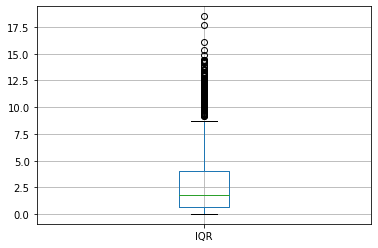

In [ ]:
df.boxplot('IQR')

El boxplot muestra muchos valores atípicos para el predictor IQR en la parte superior.

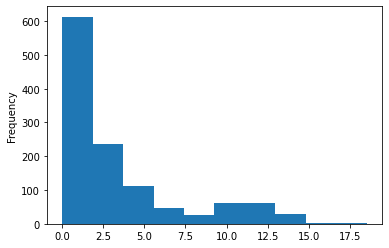

In [ ]:
df['IQR'].plot.hist()

### Predictor: Kurto

In [ ]:
df['Kurto'].describe()

count    1192.000000
mean       10.463423
std        11.603588
min        -1.409000
25%         1.371075
50%         6.452670
75%        16.431000
max        61.459600
Name: Kurto, dtype: float64

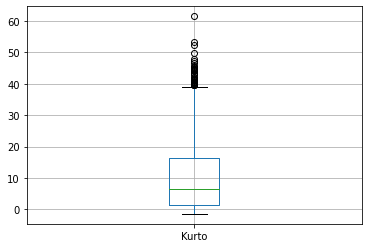

In [ ]:
df.boxplot('Kurto')

El boxplot muestra algunos valores atípicos para la variable Kurto en la parte superior.

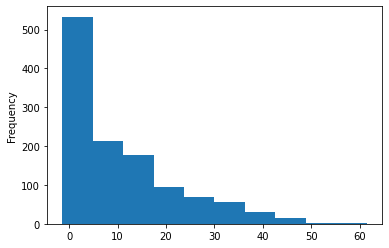

In [ ]:
df['Kurto'].plot.hist()

### Predictor: Entro 

In [ ]:
df['Entro'].describe()

count    1192.000000
mean        1.429699
std         0.501740
min         0.155600
25%         1.006950
50%         1.412100
75%         1.885632
max         2.253400
Name: Entro, dtype: float64

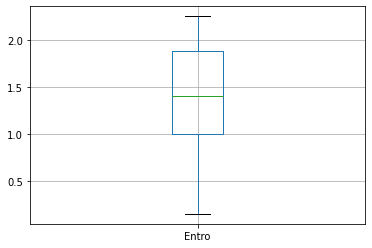

In [ ]:
df.boxplot('Entro')

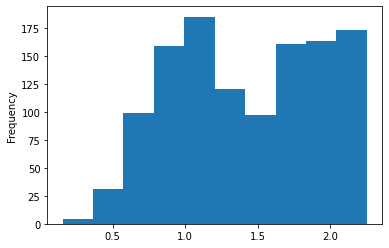

In [ ]:
df['Entro'].plot.hist()

### Predictor: Skewn

In [ ]:
df['Skewn'].describe()

count    1192.000000
mean        1.942713
std         1.441459
min        -0.692600
25%         0.727318
50%         1.553150
75%         2.842425
max         7.584200
Name: Skewn, dtype: float64

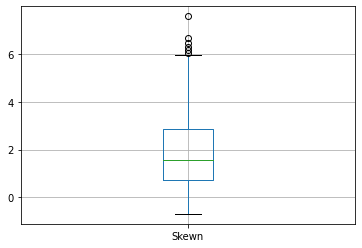

In [ ]:
df.boxplot('Skewn')

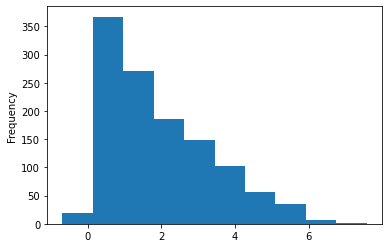

In [ ]:
df['Skewn'].plot.hist()

### Predictor: Sex

In [ ]:
df["Sex"].value_counts()

Hombre    996
Mujer     196
Name: Sex, dtype: int64

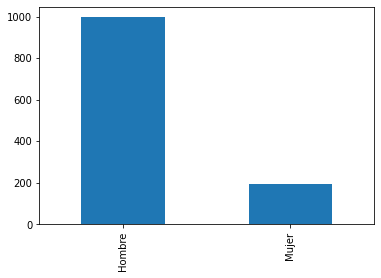

In [ ]:
df['Sex'].value_counts().plot(kind='bar')

Hay casi 4 veces más hombres que mujeres en las observaciones.

### Predictor: Comp

In [ ]:
df["Comp"].value_counts()

Slim      448
Robust    432
Medium    312
Name: Comp, dtype: int64

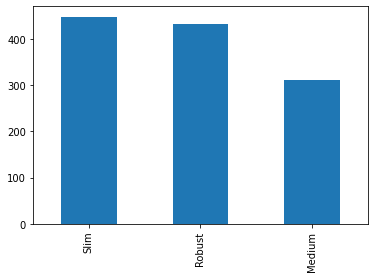

In [ ]:
df['Comp'].value_counts().plot(kind='bar')

### Predictor: Picos

In [ ]:
df['Picos'].describe()

count    1192.000000
mean        2.255034
std         2.630390
min         0.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        18.000000
Name: Picos, dtype: float64

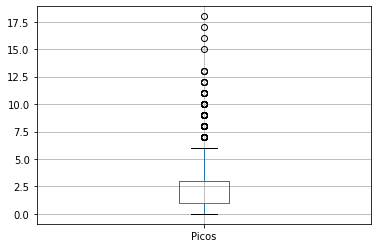

In [ ]:
df.boxplot('Picos')

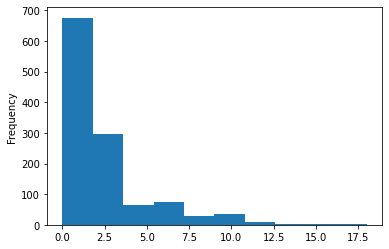

In [ ]:
df['Picos'].plot.hist()

### Predictor: Umbral

In [ ]:
df['Umbral'].describe()

count    1192.000000
mean       27.146123
std        13.736920
min       -14.976000
25%        17.665225
50%        22.288000
75%        31.658800
max        89.547700
Name: Umbral, dtype: float64

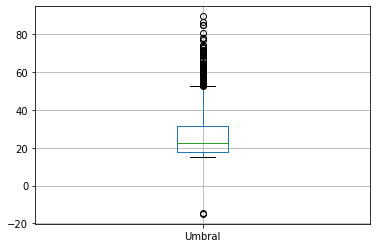

In [ ]:
df.boxplot('Umbral')

La variable Umbral tiene valores atipicos tanto en la parte inferior como en la superior como se puede apreciar en el boxplot.

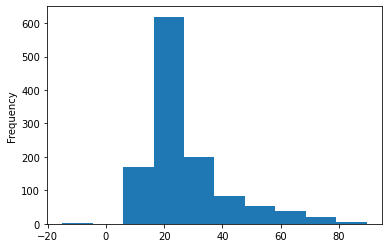

In [ ]:
df['Umbral'].plot.hist()

### Predictor: Gama

In [ ]:
df["Gama"].value_counts()

Alta     632
Media    560
Name: Gama, dtype: int64

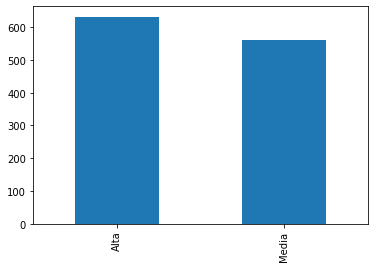

In [ ]:
df['Gama'].value_counts().plot(kind='bar')

La frecuencia de los valores que puede tomar la variable Gama estan casi balanceados.

### Variable de respuesta: Alert

In [ ]:
df['Alert'].value_counts()

False    832
True     360
Name: Alert, dtype: int64

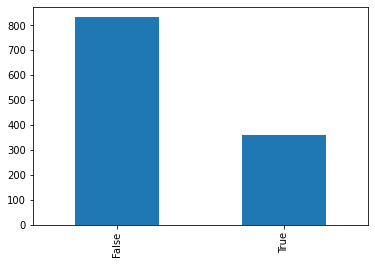

In [ ]:
df['Alert'].value_counts().plot(kind='bar')

Dado que las etiquetas no estan balanceadas utilizar la exactitud como métrica para evaluar los modelos no será buena idea.

# Preproceso de datos.

Se elimina el indice que trae los datos como primer columna.

In [ ]:
df.drop(df.filter(regex="Unname"), axis=1, inplace=True)
# Dataframe sin el indice.
df.head()

,Alert,IQR,Kurto,Entro,Skewn,Sex,Comp,Picos,Umbral,Gama
0,False,2.6938,1.73447,1.76160,0.140613,Mujer,Slim,0,15.708,Alta
1,False,2.5478,2.08198,1.71931,0.104144,Mujer,Slim,0,15.861,Alta
2,False,2.5754,3.82861,1.53336,0.687755,Mujer,Slim,2,17.283,Alta
3,False,2.5976,1.97106,1.74680,-0.076770,Mujer,Slim,1,17.490,Alta
4,False,2.5725,1.94219,1.73949,0.130674,Mujer,Slim,0,15.621,Alta


Hay 3 predictores que son categóricos, los cuales son:

In [ ]:
print('Sex: ', df['Sex'].unique())
print('Comp:', df['Comp'].unique())
print('Gama:', df['Gama'].unique())

Sex:  ['Mujer' 'Hombre']
Comp: ['Slim' 'Medium' 'Robust']
Gama: ['Alta' 'Media']


Por lo tanto, a continuación se codifican correctamente estas variables categóricas utilizando variables *dummies*.

In [ ]:
df = pd.get_dummies(df)
df.head()

,Alert,IQR,Kurto,Entro,Skewn,Picos,Umbral,Sex_Hombre,Sex_Mujer,Comp_Medium,Comp_Robust,Comp_Slim,Gama_Alta,Gama_Media
0,False,2.6938,1.73447,1.76160,0.140613,0,15.708,0,1,0,0,1,1,0
1,False,2.5478,2.08198,1.71931,0.104144,0,15.861,0,1,0,0,1,1,0
2,False,2.5754,3.82861,1.53336,0.687755,2,17.283,0,1,0,0,1,1,0
3,False,2.5976,1.97106,1.74680,-0.076770,1,17.490,0,1,0,0,1,1,0
4,False,2.5725,1.94219,1.73949,0.130674,0,15.621,0,1,0,0,1,1,0


Para evitar influencias excesivas por escala se estandarizan los predictores, lo cual hará que tengan una media muy cercana a 0 y desviación estándar cercana a 1.

In [ ]:
df['IQR'] = scale(df['IQR'])
df['Kurto'] = scale(df['Kurto'])
df['Entro'] = scale(df['Entro'])
df['Skewn'] = scale(df['Skewn'])
df['Picos'] = scale(df['Picos'])
df['Umbral'] = scale(df['Umbral'])

# Implementación

Se separan los predictores y la variable de respuesta asignandose a las variables **X** y **y** respectivamente.

In [ ]:
X = df.drop('Alert', axis=1).values
y = df['Alert'].values

Se crea un conjunto de pruebas con el 25% de las observaciones y un conjunto de entrenamiento con el resto de observaciones, quedandose con el 75%.

Con *stratify=y* se consigue que la proporción de frecuencias en la variable de respuesta se mantenga en ambos conjuntos de datos (entrenamiento y prueba).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size = 0.25, random_state = 100, stratify=y)

A continuación se estarán construyendo clasificadores de 4 tipos diferentes, donde primero se seleccionaran los hiperparametros mediante validación cruzada y despues se contruira el modelo con el/los hiperparámetro(s) que dieron el mejor resultado en la metrica F1. 

Es importante mencionar que este apartado de Implementación solo se hara uso del conjunto de entrenamiento (X_test y y_test) con el objetivo de que los modelos aprendan a generalizar mejor y al final poder evaluar que tan bien pueden predecir datos nuevos (conjunto de prueba).

## Vecinos más cercanos

In [ ]:
# Se instancia el clasificador de vecinos mas cercanos.
knn = KNeighborsClassifier()

# Rango de valores para la cantidad de vecinos que se pondran a prueba.
param_grid = { 'n_neighbors': np.arange(1, 100) }
# Se realiza la validación cruzada, utilizando 5 pliegues y F1 como la medida de calidad.
knn_cv = GridSearchCV(knn, param_grid, cv = 5, scoring='f1')

# Se realiza el ajuste con los datos de entrenamiento.
knn_cv.fit(X_train, y_train)

print(knn_cv.best_params_)
print(knn_cv.best_score_) # Mejor puntaje de F1

{'n_neighbors': 1}
0.7092783211411053


A partir de la mejor cantidad de vecinos encontrado tras realizar la validación cruzada se crea el modelo con el que se realizará la prueba de calidad que se realizará al final.

In [ ]:
# Se crea un nuevo clasificador, con el mejor valor para n_neighbors.
knn_best = KNeighborsClassifier(n_neighbors = 1)
knn_best.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

## Regresión logística 

El hiperparámetro C controla la cantidad de regularizacion: una C mas pequeña significa mas regularizacion y viceversa.

In [ ]:
# Se instancia el clasificador de regresion logistica.
logreg = LogisticRegression()

# Valores del hiperparametro C que se pondran a prueba.
param_grid = {'C': [0.1, 0.2, 0.5, 1, 10]}

# Se realiza la validación cruzada, utilizando 5 pliegues y F1 como la medida de la calidad.
logreg_cv = GridSearchCV(logreg, param_grid, cv=5, scoring='f1')

# Se realiza el ajuste con los datos de entrenamiento.
logreg_cv.fit(X_train, y_train)

print(logreg_cv.best_params_)
print(logreg_cv.best_score_) # Mejor puntaje de F1

{'C': 0.2}
0.6883130071521084


A partir del mejor valor para C encontrado, se crea el mejor modelo con el que se realizará la prueba de calidad que se realizará al final.

In [ ]:
# Se crea un nuevo clasificador, con el mejor valor para C.
logreg_best = LogisticRegression(C=0.2)
logreg_best.fit(X_train, y_train)

LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Redes neuronales

El modelo base que estare utilizando cuenta con 2 capas, una capa oculta de 13 neuronas con las 13 entradas que correponden al total de predictores y una capa de salida de una neurona que al tratarse de un problema de clasificación binaria tendra la función Sigmoide como función de activación.



La siguiente función se encarga de crear diferentes modelos de redes neuronales a partir del modelo base, donde se pondran a prueba diferentes optimizadores y funciones de activación (para la capa oculta).

La normalización por lotes, realizada con *BatchNormalization()*, asegura que independientemente de los cambios, las entradas a las siguientes capas esten normalizadas.

Cuando el modelo de la red neuronal se compila se le pasa *binary_crossentropy* como la función de costo, esto es asi porque que la entropia cruzada binaria es la funcion que se utliza cuando la neurona de salida usa la Sigmoide como su función de activación, el cual es nuestro caso.

In [ ]:
def create_model(optimizer='adam', activation='relu'):
    # Se instancia el nuevo modelo.
    model = Sequential()
    # Se agrega una capa. Capa oculta.
    model.add(Dense(13, input_shape=(13, ), activation=activation))
    model.add(BatchNormalization())
    # Se agrega otra capa. Capa de salida.
    model.add(Dense(1, activation='sigmoid'))
    # Se compila el modelo.
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
# Se crea el modelo como un estimador sklearn
neu_net = KerasClassifier(build_fn=create_model)

Para la selección de los mejores hiperparamatros, para este tipo de clasificador se utilizará *RandomizedSearchCV*, ya que este método selecciona  hiperparametros de manera aleatoria para ir evaluando el modelo, lo que lo hace más rapido comparandolo con *GridSearchCV*, y que será util en este caso porque son más hiperparametros que se van a probar.

Es importante mencionar que la implementación de las redes neuronales tienen cierta aleatoriedad, lo que hara que los hiperparametros seleccionados o resultados no siempre sean los mismos.

In [ ]:
# Hiperparametros que se pondran a prueba en el modelo de redes neuronales.
params = dict(optimizer=['sgd', 'adam'], epochs=[50, 100, 200],
              batch_size=[32, 128, 256], activation=['relu', 'leaky_relu', 'sigmoid', 'tanh'])

random_search = RandomizedSearchCV(neu_net, param_distributions = params, cv = 5)

random_search_results = random_search.fit(X_train, y_train, verbose=0)

print(random_search_results.best_score_)
print(random_search_results.best_params_)

6/6 [==============================] - 0s 2ms/step - loss: 0.3439 - accuracy: 0.8258
0.8333061218261719
{'optimizer': 'adam', 'epochs': 200, 'batch_size': 128, 'activation': 'relu'}


In [ ]:
print(random_search_results.best_params_)
print(random_search_results.best_score_) # Mejor puntaje en la exactitud.

{'optimizer': 'adam', 'epochs': 200, 'batch_size': 128, 'activation': 'relu'}
0.8333061218261719


A partir de los mejores hiperparámetros encontrados tras realizar la validación cruzada, se crea el mejor modelo de redes neuronales con el que se realizará la prueba de calidad que se realizará al final.

In [ ]:
neu_net_best = Sequential()
neu_net_best.add(Dense(13, input_shape=(13, ), activation='relu'))
neu_net_best.add(Dense(1, activation='sigmoid'))
neu_net_best.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Precision', 'Recall'])
neu_net_best.fit(X_train, y_train, epochs= 200, batch_size=128, verbose=0)

-------------------------------------

## Máquinas de soporte vectorial (con diferentes kérneles)

Las máquinas de soporte vectorial es un tipo de clasificador lineal.

Los vectores de soporte incluyen incorrectamente ejemplos clasificados, asi como ejemplos correctamente clasificados que estan cerca del limite (la cercania esta controlada por la fuerza de regularización, C).

Tener un numero pequeño de vectores de soporte hace que SVM's con kerneles sea muy rapidos para ajustar y predecir.

Cuando en el espacio original no es posible ajustar un modelo lineal, se tranforma el espacio para despues ajustar un modelo lineal en el espacio transformado, para lograr estas trasnformaciones se utilizan otros kerneles que no sean del tipo lineal.

A contrinuación se pondran a prueba las maquinas de soporte vectorial utilizando 3 tipos de kerneles, según el tipo de kernal se puede ajustar uno o mas hiperparametros.

Kernel lineal.

In [ ]:
svm = SVC(kernel='linear')

param_grid = {'C':[0.1, 1, 10]}
svm_cv = GridSearchCV(svm, param_grid, scoring='f1')
svm_cv.fit(X_train, y_train)

print("Mejor parametro:", svm_cv.best_params_)
print("Mejor F1:", svm_cv.best_score_)

Mejor parametro: {'C': 10}
Mejor F1: 0.6924882948766443


Kernel RBS (Radial basis functions) o función de base radial.

Al disminuir el hiperparámetro gamma, podemos suavizar los limites, al aumentarlo se crean limites mas complejos que puede llevar al sobreentrenamiento.

In [ ]:
svm = SVC(kernel='rbf') # Kernel por defecto para SVC()

param_grid = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
svm_cv = GridSearchCV(svm, param_grid, scoring='f1')
svm_cv.fit(X_train, y_train)

print("Mejores parametros:", svm_cv.best_params_)
print("Mejor F1:", svm_cv.best_score_)

Mejores parametros: {'C': 10, 'gamma': 0.1}
Mejor F1: 0.7278463708797487


Kernel polinomial.

In [ ]:
svm = SVC(kernel='poly')

param_grid = {'C':[0.1, 1, 10], 'degree': [1, 3, 10, 15]}
svm_cv = GridSearchCV(svm, param_grid, scoring='f1')
svm_cv.fit(X_train, y_train)

print("Mejor parametro:", svm_cv.best_params_)
print("Mejor F1:", svm_cv.best_score_)

Mejor parametro: {'C': 10, 'degree': 3}
Mejor F1: 0.7188119937146709


De los diferentes kerneles el que obtuvo un mejor valor en la medida F1 fue RBF, por lo que se crea el modelo final utilizando los mejores hiperparámetros encontrados para ese tipo de kernel.

In [ ]:
svm_best = SVC(kernel='rbf', C=10, gamma=0.1)
svm_best.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Evaluación y comparación de modelos

A continuación se evaluara la calidad de los predictores utilizando el conjunto de pruebas previamente separado, para ello se utilizaran los modeles finales creados con los mejores hiperparámetros obtenidos para cada clasificador en el apartado de Implementación.

## Vecinos más cercanos

In [ ]:
# Se predicen las etiquetas a partir de los datos de pruebas.
y_pred = knn_best.predict(X_test)

# Se calcula e imprime la matriz de confusion y el reporte de clasificación.
print(confusion_matrix(y_test, y_pred)) # tn, fp, fn, tp
print(classification_report(y_test, y_pred))

[[183  25]
 [ 26  64]]
              precision    recall  f1-score   support

       False       0.88      0.88      0.88       208
        True       0.72      0.71      0.72        90

    accuracy                           0.83       298
   macro avg       0.80      0.80      0.80       298
weighted avg       0.83      0.83      0.83       298



In [ ]:
knn_precision = 0.72      
knn_recall = 0.71      
knn_f1 = 0.72 

## Regresión logística

In [ ]:
y_pred = logreg_best.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[183  25]
 [ 33  57]]
              precision    recall  f1-score   support

       False       0.85      0.88      0.86       208
        True       0.70      0.63      0.66        90

    accuracy                           0.81       298
   macro avg       0.77      0.76      0.76       298
weighted avg       0.80      0.81      0.80       298



In [ ]:
logreg_precision = 0.70        
logreg_recall = 0.63        
logreg_f1 = 0.66    

## Redes neuronales

In [ ]:
neu_net_best.evaluate(X_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.3385 - precision: 0.7468 - recall: 0.6556


[0.33852556347846985, 0.746835470199585, 0.6555555462837219]

In [ ]:
neu_net_precision = 0.75
neu_net_recall = 0.66
neu_net_f1 = 2 * (0.746835470199585*0.6555555462837219) / (0.746835470199585+0.6555555462837219)
neu_net_f1 = np.round(neu_net_f1, 2)

## Máquinas de soporte vectorial

In [ ]:
y_pred = svm_best.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[191  17]
 [ 29  61]]
              precision    recall  f1-score   support

       False       0.87      0.92      0.89       208
        True       0.78      0.68      0.73        90

    accuracy                           0.85       298
   macro avg       0.83      0.80      0.81       298
weighted avg       0.84      0.85      0.84       298



In [ ]:
svm_precision =  0.78         
svm_recall = 0.68          
svm_f1 = 0.73   

## Tabla comparativa

In [ ]:
results = pd.DataFrame({
                   'KNN': [knn_precision, knn_recall, knn_f1],
                   'Log Reg': [logreg_precision, logreg_recall, logreg_f1],
                   'Neural networks': [neu_net_precision, neu_net_recall, neu_net_f1],
                   'SVM': [svm_precision, svm_recall, svm_f1]}, 
                   index=['Precision', 'Recall', 'F1'])

In [ ]:
results.transpose()

,Precision,Recall,F1
KNN,0.72,0.71,0.72
Log Reg,0.70,0.63,0.66
Neural networks,0.75,0.66,0.70
SVM,0.78,0.68,0.73


De la tabla anterior se puede observar que la mas alta precisión la tiene el clasificador de máquinas de soporte vectorial, la mas alta exhaustividad la obtuvo el clasificador de vecinos más cercanos y el más alto valor de F1 lo obtuvo nuevamente el clasificador de máquinas de soporte vectorial.